In [1]:
# Import libraries. You may or may not use all of these.
#!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2024-04-13 10:22:43.779646: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-13 10:22:43.779854: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 10:22:43.781839: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 10:22:43.805484: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-13 10:22:44.224923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
!rm insurance.csv
dataset.tail()

--2024-04-13 10:22:44--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.009s  

2024-04-13 10:22:44 (5.34 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
#preprocess data
dataset['sex'] = dataset['sex'].map({'female':0, 'male':1})
dataset['smoker'] = dataset['smoker'].map({'no':0, 'yes':1})
#check what values there are for region
#dataset['region'].unique()
dataset['region'] = dataset['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':4})


#split into training and testing sets
train = dataset.sample(frac=0.80, random_state=0)
test_dataset = dataset.drop(train.index)

#seperate labels from features
train_labels = train.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [4]:
#create regression model
model = keras.Sequential()
model.add(layers.Input(shape=[len(train.keys())]))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(loss='mse', optimizer='RMSprop', metrics=['mae', 'mse'])

2024-04-13 10:22:45.109456: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-13 10:22:45.109709: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
#train model
history = model.fit(train, train_labels, epochs=150, validation_split=0.20)

Epoch 1/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 311456832.0000 - mae: 12735.8447 - mse: 311456832.0000 - val_loss: 330194368.0000 - val_mae: 13285.8174 - val_mse: 330194368.0000
Epoch 2/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259760768.0000 - mae: 10841.3086 - mse: 259760768.0000 - val_loss: 195653552.0000 - val_mae: 8341.5723 - val_mse: 195653552.0000
Epoch 3/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 133205648.0000 - mae: 7199.0815 - mse: 133205648.0000 - val_loss: 145332336.0000 - val_mae: 9264.1143 - val_mse: 145332336.0000
Epoch 4/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 120130432.0000 - mae: 8657.9463 - mse: 120130432.0000 - val_loss: 144800944.0000 - val_mae: 9328.7637 - val_mse: 144800944.0000
Epoch 5/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 129066056.0000 - mae: 9072.8877 - mse: 129066056.0000 - val_loss: 147025472.0000 - val_mae: 8897.4551 - val_mse: 147025472.0000
Epoch 6/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 128

9/9 - 0s - 2ms/step - loss: 37452172.0000 - mae: 3377.9397 - mse: 37452172.0000
Testing set Mean Abs Error: 3377.94 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


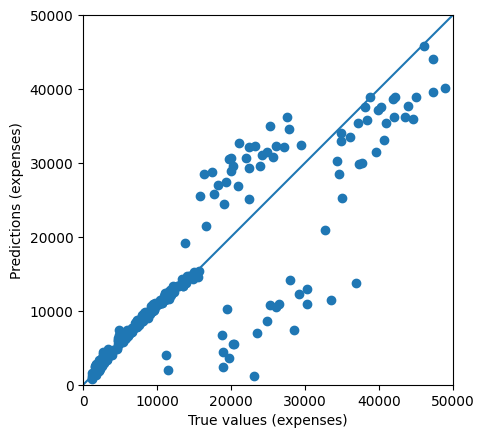

In [6]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
